GBIF.org (26 October 2024) GBIF Occurrence Download  https://doi.org/10.15468/dl.gu5t27

## Questions 1 + 2

### Imports

In [16]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde

In [2]:
original_data = pd.read_csv('kenya_birds.csv', sep='\t')
original_data.head()

/var/folders/cc/h352fz_d24n9tjfbnmrxstbh0000gn/T/ipykernel_9921/1727274082.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv('kenya_birds.csv', sep='\t')


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,1986821111,d1e8a7af-097a-4ca8-aa91-62d3ff834711,d33e1483-ad6a-4aa2-95bd-5d4568a3cd3b,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-03-21T12:54:52.894Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,1986821110,d1e8a7af-097a-4ca8-aa91-62d3ff834711,d12a2b54-f12a-40a7-bfb5-90b4998af7d3,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-03-21T12:54:54.972Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,1986821109,d1e8a7af-097a-4ca8-aa91-62d3ff834711,ff92601a-f8b9-4db0-90a1-e4d0b233ace0,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-03-21T12:54:57.153Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,1986821108,d1e8a7af-097a-4ca8-aa91-62d3ff834711,a6bf4a1c-5c59-4a23-a18a-4ca9e6c36342,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-03-21T12:55:11.136Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,1986821107,d1e8a7af-097a-4ca8-aa91-62d3ff834711,215c7fe0-9e39-4497-86b5-87532c478ef8,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2024-03-21T12:54:51.116Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


### Data pre-processing

First, let's remove rows that are irrelevant for our analysis:

In [3]:
df1 = original_data.drop(['gbifID', 'datasetKey', 'occurrenceID', 'verbatimScientificNameAuthorship', 'countryCode', 'publishingOrgKey', 'institutionCode', 'collectionCode', 
                 'catalogNumber', 'recordNumber', 'license', 'rightsHolder', 'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted'], axis=1)

df1.head()

,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,...,day,month,year,taxonKey,speciesKey,basisOfRecord,identifiedBy,dateIdentified,mediaType,issue
0,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,9,11,2017,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,NaN,SPECIES,"Zosterops senegalensis Bonaparte, 1850",...,1,6,2017,2489344,2489344.0,HUMAN_OBSERVATION,NaN,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,NaN,SPECIES,"Zosterops senegalensis Bonaparte, 1850",...,1,6,2017,2489344,2489344.0,HUMAN_OBSERVATION,NaN,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,6,10,2017,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,6,10,2017,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


Now, let's remove columns that are a form of duplicate of other columns:

In [4]:
df2 = df1.drop(['day', 'month', 'year', 'dateIdentified' # the date is contained in 'eventDate'
                ], axis=1)

df2.head()

,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,...,elevationAccuracy,depth,depthAccuracy,eventDate,taxonKey,speciesKey,basisOfRecord,identifiedBy,mediaType,issue
0,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,NaN,NaN,NaN,2017-11-09,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,NaN,SPECIES,"Zosterops senegalensis Bonaparte, 1850",...,NaN,NaN,NaN,2017-06-01,2489344,2489344.0,HUMAN_OBSERVATION,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,NaN,SPECIES,"Zosterops senegalensis Bonaparte, 1850",...,NaN,NaN,NaN,2017-06-01,2489344,2489344.0,HUMAN_OBSERVATION,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,NaN,NaN,NaN,2017-10-06,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,NaN,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",...,NaN,NaN,NaN,2017-10-06,6100772,6100772.0,HUMAN_OBSERVATION,NaN,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


Let's check for missing values:

In [5]:
missing_counts = df2.isnull().sum()

total_rows = len(df2)
missing_percentage = (missing_counts / total_rows) * 100

missing_summary = pd.DataFrame({
    'Column Name': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing Percentage': missing_percentage.values
})

print(missing_summary)

                      Column Name  Missing Count  Missing Percentage
0                         kingdom              0            0.000000
1                          phylum              0            0.000000
2                           class              0            0.000000
3                           order              0            0.000000
4                          family              0            0.000000
5                           genus              0            0.000000
6                         species            185            0.206400
7            infraspecificEpithet          89593           99.956489
8                       taxonRank              0            0.000000
9                  scientificName              0            0.000000
10         verbatimScientificName              0            0.000000
11                       locality          89632          100.000000
12                  stateProvince          89632          100.000000
13               occurrenceStatus 

Let's remove the columns with nearly all, or all values missing:

In [6]:
df3 = df2.drop(['infraspecificEpithet', 'locality', 'stateProvince', 'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation', 'elevationAccuracy',
                'depth', 'depthAccuracy', 'identifiedBy', 'mediaType'], axis=1)

df3.head()

,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,verbatimScientificName,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,eventDate,taxonKey,speciesKey,basisOfRecord,issue
0,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,PRESENT,1.0,-3.432285,38.341012,2017-11-09,6100772,6100772.0,HUMAN_OBSERVATION,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,SPECIES,"Zosterops senegalensis Bonaparte, 1850",Zosterops senegalensis,PRESENT,1.0,0.206000,34.884667,2017-06-01,2489344,2489344.0,HUMAN_OBSERVATION,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,SPECIES,"Zosterops senegalensis Bonaparte, 1850",Zosterops senegalensis,PRESENT,4.0,-0.558500,36.523667,2017-06-01,2489344,2489344.0,HUMAN_OBSERVATION,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,PRESENT,1.0,-3.399601,38.329516,2017-10-06,6100772,6100772.0,HUMAN_OBSERVATION,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,PRESENT,1.0,-3.380438,38.353286,2017-10-06,6100772,6100772.0,HUMAN_OBSERVATION,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


In [7]:
unique_occurrence_status = df3['occurrenceStatus'].unique()
unique_basis_of_record = df3['basisOfRecord'].unique()

print("Unique values in 'occurrenceStatus':")
print(unique_occurrence_status)

print("\nUnique values in 'basisOfRecord':")
print(unique_basis_of_record)

Unique values in 'occurrenceStatus':
['PRESENT']

Unique values in 'basisOfRecord':
['HUMAN_OBSERVATION']


Let's remove those columns as well since they take the same value for all rows:

In [8]:
df = df3.drop(['occurrenceStatus', 'basisOfRecord'], axis=1)

df.head()

,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,verbatimScientificName,individualCount,decimalLatitude,decimalLongitude,eventDate,taxonKey,speciesKey,issue
0,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,1.0,-3.432285,38.341012,2017-11-09,6100772,6100772.0,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,SPECIES,"Zosterops senegalensis Bonaparte, 1850",Zosterops senegalensis,1.0,0.206000,34.884667,2017-06-01,2489344,2489344.0,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops senegalensis,SPECIES,"Zosterops senegalensis Bonaparte, 1850",Zosterops senegalensis,4.0,-0.558500,36.523667,2017-06-01,2489344,2489344.0,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,1.0,-3.399601,38.329516,2017-10-06,6100772,6100772.0,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,Animalia,Chordata,Aves,Passeriformes,Zosteropidae,Zosterops,Zosterops silvanus,SPECIES,"Zosterops silvanus J.L.Peters & Loveridge, 1935",Zosterops silvanus,1.0,-3.380438,38.353286,2017-10-06,6100772,6100772.0,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


### Question 1

In [9]:
df1['order'].nunique()

28

Let's plot:

/var/folders/cc/h352fz_d24n9tjfbnmrxstbh0000gn/T/ipykernel_9921/1504288820.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_orders))  # Choose 'tab20' or any other colormap


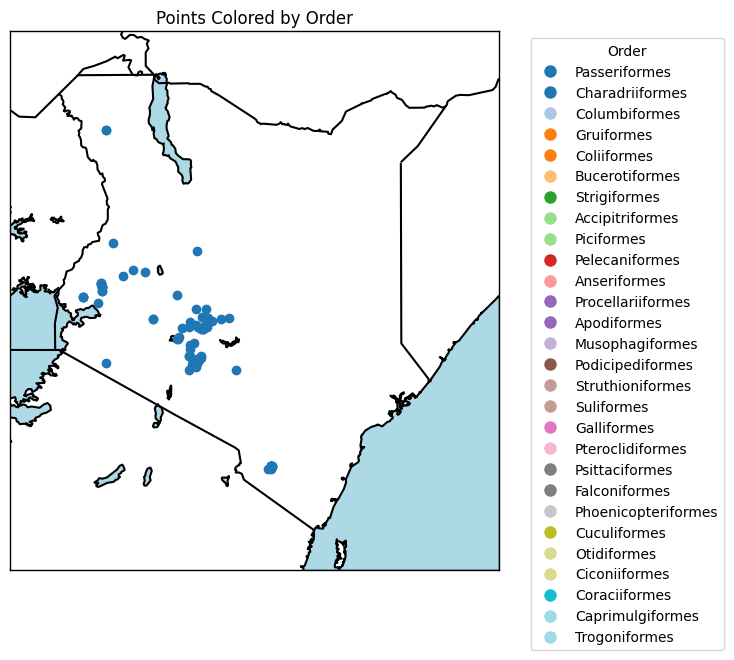

In [10]:
df_subset = df.head(100)

# Get unique values from the 'order' column
unique_orders = df['order'].unique()

# Create a color map
colors = plt.cm.get_cmap('tab20', len(unique_orders))  # Choose 'tab20' or any other colormap

# Create a mapping of unique values to colors
order_color_map = {order: colors(i) for i, order in enumerate(unique_orders)}

plt.figure(figsize=(10, 7))
m = Basemap(projection='merc',
            llcrnrlat=-5.5, urcrnrlat=5.5,  # Latitude limits
            llcrnrlon=33, urcrnrlon=43,  # Longitude limits
            resolution='i')

m.drawmapboundary(fill_color='lightblue')  # Ocean color
m.fillcontinents(color='white', lake_color='lightblue')  # Land color
m.drawcountries(linewidth=1.5, color='black')  # Country boundaries
m.drawcoastlines(linewidth=1.5, color='black')  # Coastline

# Plot each point with the corresponding color
for index, row in df_subset.iterrows():
    x, y = m(row['decimalLongitude'], row['decimalLatitude'])
    plt.scatter(x, y, marker='o', color=order_color_map[row['order']], zorder=5, label=row['order'])

# Optional: Create a legend to display the order categories
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=order_color_map[order], markersize=10) for order in unique_orders]
plt.legend(handles, unique_orders, title='Order', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Points Colored by Order')
plt.show()

make 28 small plots, 1 per order

/var/folders/cc/h352fz_d24n9tjfbnmrxstbh0000gn/T/ipykernel_9921/1984147402.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_orders))  # Choose 'tab20' or any other colormap


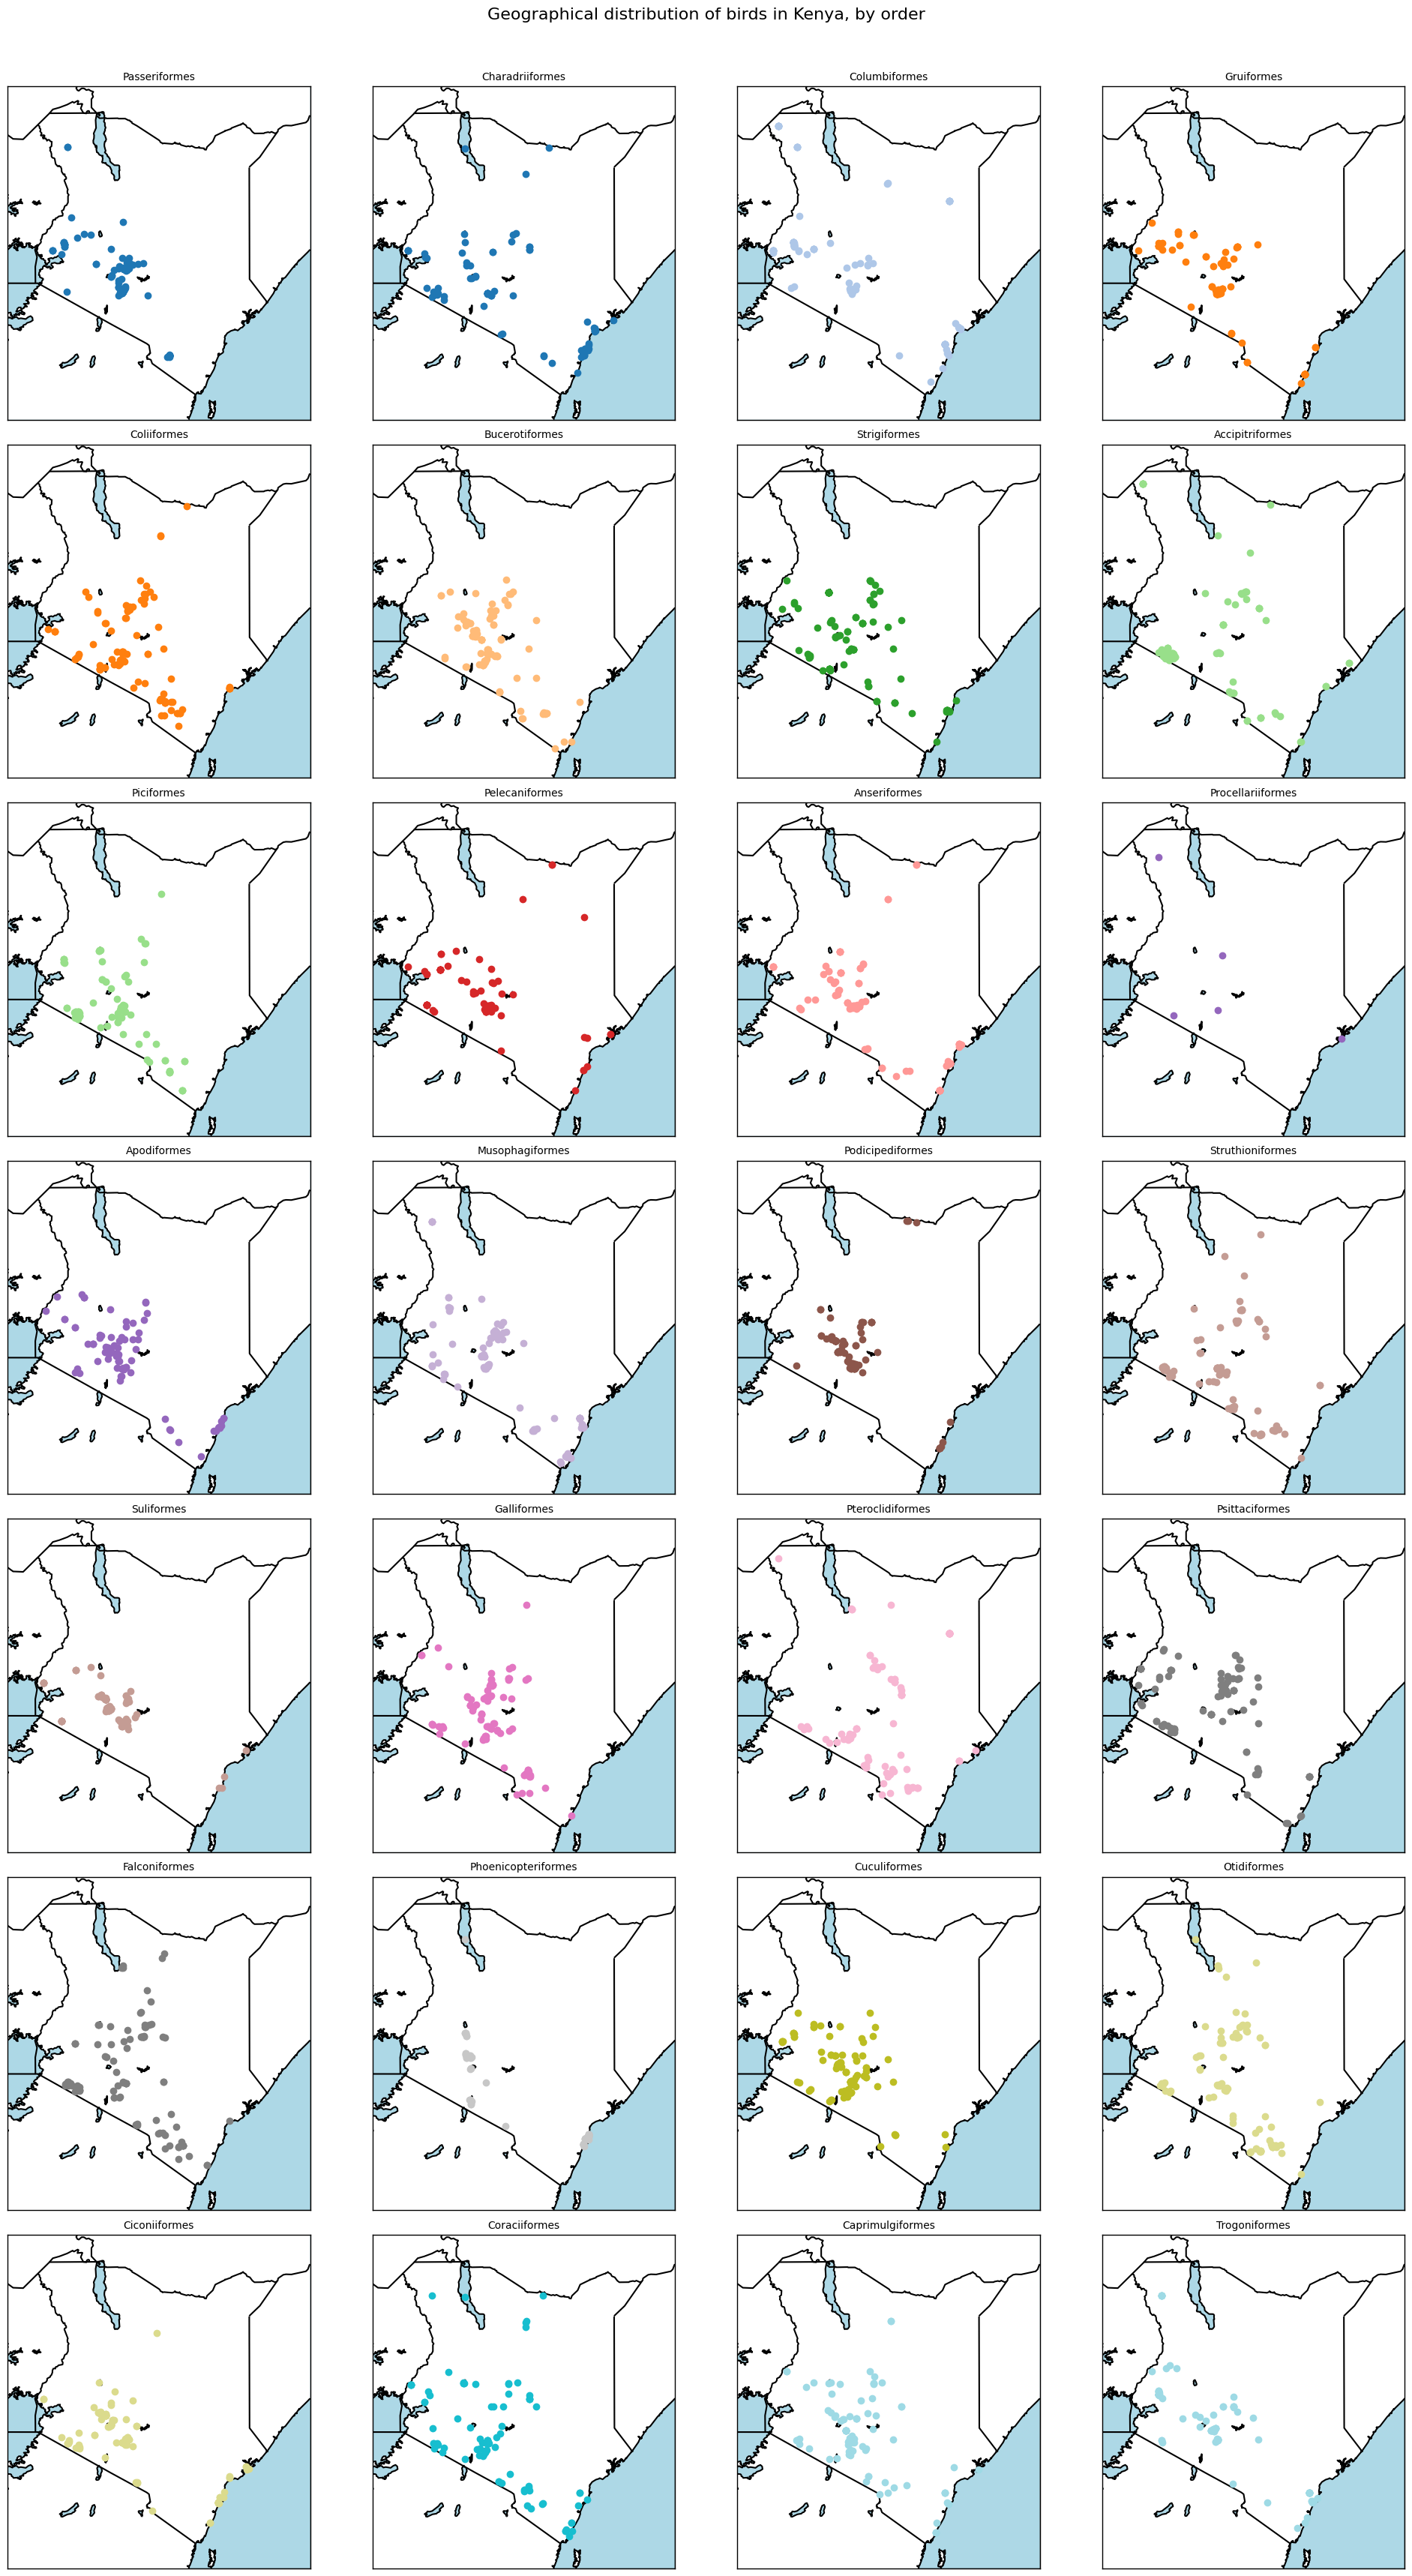

In [13]:
colors = plt.cm.get_cmap('tab20', len(unique_orders))  # Choose 'tab20' or any other colormap

# Create a mapping of unique values to colors
order_color_map = {order: colors(i) for i, order in enumerate(unique_orders)}

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(20, 35))
axs = axs.flatten()

# Loop through each unique order and create a map
for i, order in enumerate(unique_orders):
    # Filter DataFrame for the current order
    df_order = df[df['order'] == order].head(100)  # Limit to the first 100 entries for now

    # Create Basemap for the current subplot
    m = Basemap(projection='merc',
                llcrnrlat=-5.5, urcrnrlat=5.5,  # Latitude limits
                llcrnrlon=33, urcrnrlon=43,  # Longitude limits
                resolution='i', ax=axs[i])

    m.drawmapboundary(fill_color='lightblue')  # Ocean color
    m.fillcontinents(color='white', lake_color='lightblue')  # Land color
    m.drawcountries(linewidth=1.5, color='black')  # Country boundaries
    m.drawcoastlines(linewidth=1.5, color='black')  # Coastline

    # Plot the points for the current order using the inherited color mapping
    if not df_order.empty:  # Check if there's data to plot
        x, y = m(df_order['decimalLongitude'].values, df_order['decimalLatitude'].values)
        m.scatter(x, y, marker='o', color=order_color_map[order], zorder=5)

    # Set the title for the subplot
    axs[i].set_title(order, fontsize=10)

plt.tight_layout()
plt.suptitle('Geographical distribution of birds in Kenya, by order', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

I need to find a palette with more colors... for now it will do.

### Question 2

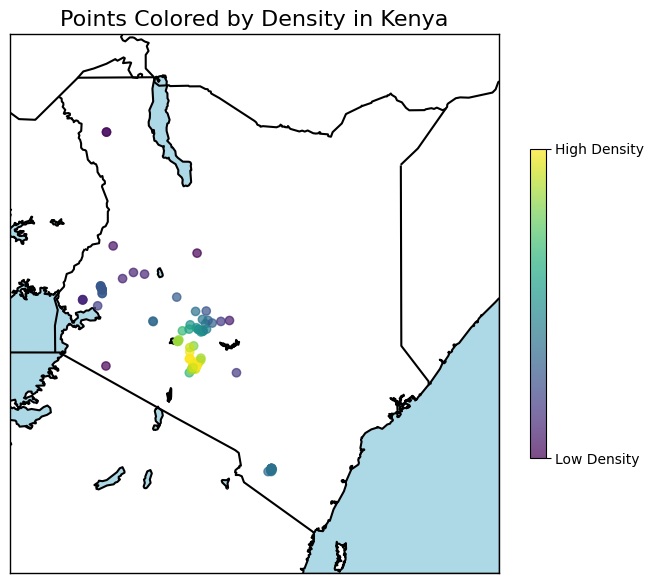

In [26]:
plt.figure(figsize=(10, 7))
m = Basemap(projection='merc',
            llcrnrlat=-5.5, urcrnrlat=5.5,  # Latitude limits
            llcrnrlon=33, urcrnrlon=43,  # Longitude limits
            resolution='i')

m.drawmapboundary(fill_color='lightblue')  # Ocean color
m.fillcontinents(color='white', lake_color='lightblue')  # Land color
m.drawcountries(linewidth=1.5, color='black')  # Country boundaries
m.drawcoastlines(linewidth=1.5, color='black')  # Coastline

# Extract the latitude and longitude
latitudes = df_subset['decimalLatitude'].values
longitudes = df_subset['decimalLongitude'].values

# Create a grid for the density estimation
lon_grid = np.linspace(33, 43, 100)  # Longitude grid
lat_grid = np.linspace(-5.5, 5.5, 100)  # Latitude grid
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Flatten the grid to evaluate the density
positions = np.vstack([lon_mesh.ravel(), lat_mesh.ravel()])
values = np.vstack([longitudes, latitudes])

# Create a Gaussian KDE
kde = gaussian_kde(values)

# Evaluate the density on the grid
density = kde(positions).reshape(lon_mesh.shape)

# Normalize the density for colormap
density_normalized = (density - density.min()) / (density.max() - density.min())

# Create a colormap for the density
cmap = plt.get_cmap('viridis')

# Calculate the density value for each point and map to colors
point_density = kde(np.vstack([longitudes, latitudes]))
colors = cmap((point_density - point_density.min()) / (point_density.max() - point_density.min()))

# Plot the points with the corresponding colors
x_points, y_points = m(longitudes, latitudes)
scatter = m.scatter(x_points, y_points, marker='o', color=colors, zorder=5, alpha=0.7)

# Add a color bar
cbar = plt.colorbar(scatter, orientation='vertical', fraction=0.02, pad=0.04)

# Set color bar ticks to show 0 and 1
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Low Density', 'High Density'])

# Add title
plt.title('Points Colored by Density in Kenya', fontsize=16)

# Show the plot
plt.show()

fix the legend one day

aaaa wait what about the column individualCount... maybe we need to take this into account... we'll see